# Superstore Analysis

By Kaamil Nailal Muna

#### Problem Statement

- The Superstore dataset provides sales and profit data for a variety of products across different categories and regions.
- The goal of this project is to analyze the data and identify insights that can help the company improve its business performance. 
- Specifically, we aim to answer questions such as: which product categories are the most profitable? Which regions have the highest sales and profit? What are the most profitable products? 
- By answering these questions, we hope to provide recommendations for the company on how to optimize its product offerings and improve its revenue and profitability.


### Assumptions

- The superstore dataset contains a representative sample of all transactions conducted by the store during the time period covered by the dataset.
- The data in the superstore dataset is accurate and has been cleaned and preprocessed prior to analysis.
- The superstore dataset covers a sufficient time period to allow for the identification of trends or patterns in sales and profitability.
- The Super Store dataset is not impacted by any significant outliers or anomalies that could skew the results of any analysis conducted on the dataset.

### Research Question

1. Which product categories have the highest profit margins in the Super Store?
2. Are there any significant differences in sales based on regions?
3. How do sales vary by product category during different months of the year?
4. How is the ship mode distribution for all products? Then what is the relationship between ship mode and the profits obtained?
5. What is the average daily profit distribution? Is there a difference between weekdays and weekends?

# Execution

In [235]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [236]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [237]:
import warnings
warnings.filterwarnings('ignore')

In [238]:
data = pd.read_csv('superstore_dataset2011-2015.csv', encoding = 'ISO-8859-1')
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.000,106.140,35.460,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.100,36.036,9.720,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.000,29.640,8.170,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.500,-26.055,4.820,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.100,37.770,4.700,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.200,4.519,0.890,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.000,0.420,0.490,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.000,12.360,0.350,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.000,0.560,0.200,Medium


### Explore the data

#### 1. Display top 5 rows

In [239]:
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.000,106.140,35.460,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.100,36.036,9.720,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.000,29.640,8.170,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.500,-26.055,4.820,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.100,37.770,4.700,Medium


In [240]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

#### 2. Display the last 5 rows

In [241]:
data.tail(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.200,4.519,0.890,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.000,0.420,0.490,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.000,12.360,0.350,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.000,0.560,0.200,Medium
51289,36388,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,...,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.200,-0.605,0.170,Medium


#### 3. Shape of the dataset

In [242]:
data.shape

(51290, 24)

#### 4. Get information about the data first

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

#### 5. Check null values in the dataset

In [244]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

The postal code has a lot off null values

#### 6. Check the duplicate

In [245]:
data.duplicated().any()

False

no one data duplicated

#### 7. Get the statistic data

In [246]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000,9994.000,51290.000,51290.000,51290.000,51290.000,51290.000
mean,25645.500,55190.379,246.491,3.477,0.143,28.611,26.376
std,14806.292,32063.693,487.565,2.279,0.212,174.341,57.297
min,1.000,1040.000,0.444,1.000,0.000,-6599.978,0.000
25%,12823.250,23223.000,30.759,2.000,0.000,0.000,2.610
50%,25645.500,56430.500,85.053,3.000,0.000,9.240,7.790
75%,38467.750,90008.000,251.053,5.000,0.200,36.810,24.450
max,51290.000,99301.000,22638.480,14.000,0.850,8399.976,933.570


#### 8. Drop unnecessary columns

In [247]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [248]:
data = data.drop(['Row ID', 'Order ID', 'Customer ID', 'Postal Code'], axis=1)

In [249]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

## Research answer

#### 1. Which product categories have the highest profit margins in the Super Store?

In [250]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [251]:
profit_by_category = data.groupby('Category')['Profit'].sum()
df_profit_by_category = pd.DataFrame(profit_by_category).reset_index()
df_profit_by_category_sorted = df_profit_by_category.sort_values(by='Profit', ascending=False)
df_profit_by_category_sorted

,Category,Profit
2,Technology,663778.733
1,Office Supplies,518473.834
0,Furniture,285204.724


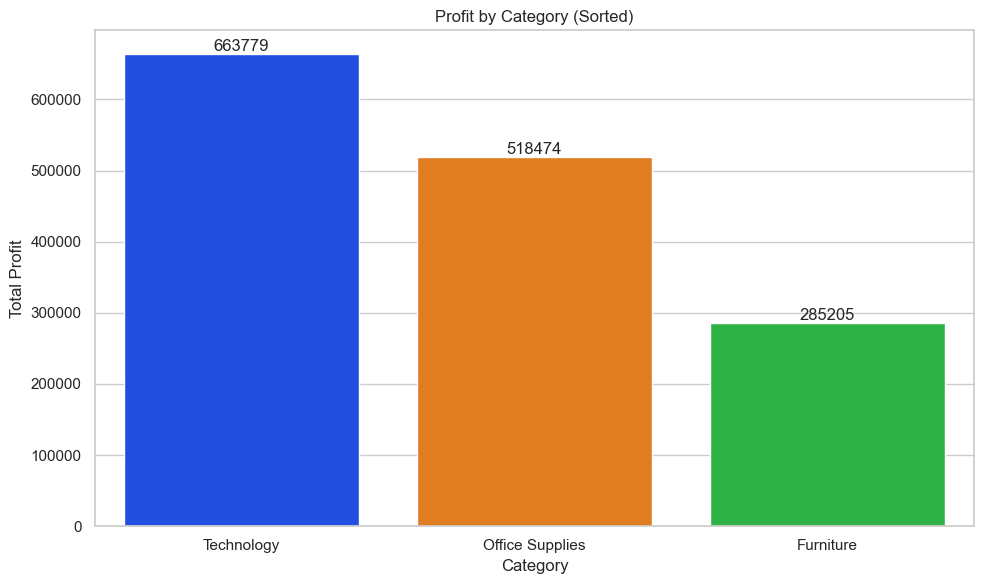

In [252]:
profit_by_category_sorted = profit_by_category.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
profit_category_bar = sns.barplot(x=profit_by_category_sorted.index, y=profit_by_category_sorted.values, palette='bright')
for bars in profit_category_bar.containers:
    profit_category_bar.bar_label(bars)
plt.title('Profit by Category (Sorted)')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

So, based on the graphic above, Technology products have the highest profit margin of the three categories.

#### 2. Are there any significant differences in sales based on regions?

In [253]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [254]:
market_sales = data.groupby('Market')['Sales'].sum()
market_sales_table = pd.DataFrame(market_sales).reset_index()
market_sales_table_sorted = market_sales_table.sort_values(by='Sales', ascending=False)
market_sales_table_sorted

,Market,Sales
0,APAC,3585744.129
4,EU,2938089.061
6,US,2297200.860
5,LATAM,2164605.167
3,EMEA,806161.311
1,Africa,783773.211
2,Canada,66928.170


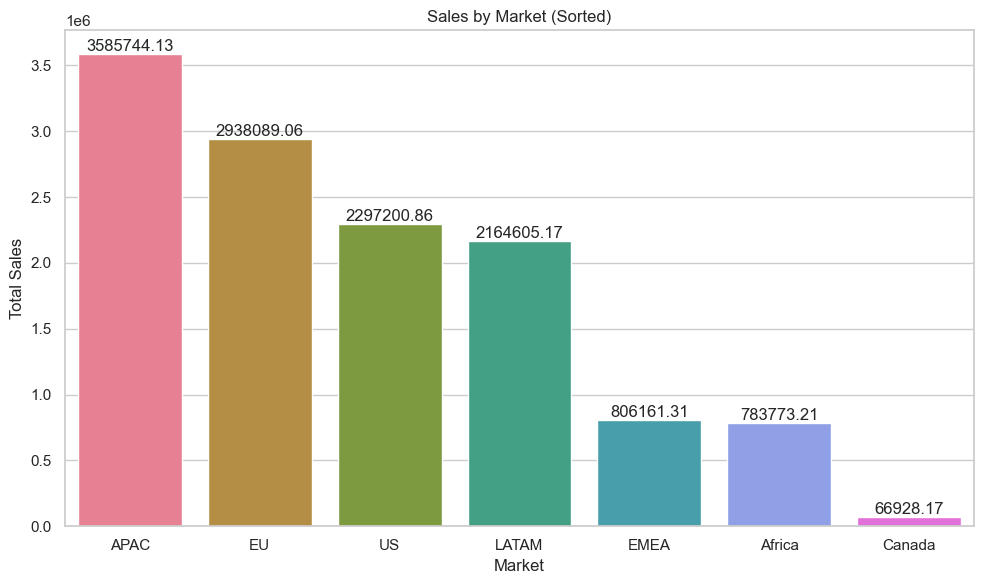

In [255]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Market', y='Sales', data=market_sales_table_sorted, palette='husl')

plt.title('Sales by Market (Sorted)')
plt.xlabel('Market')
plt.ylabel('Total Sales')
plt.xticks(rotation=0, ha='center')  
for index, value in enumerate(market_sales_table_sorted['Sales']):
    plt.text(index, value + 10, str(round(value, 2)), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

As in the graph, the largest market is located in APAC/Asia Pacific

In [256]:
region_sales = data.groupby('Region')['Sales'].sum()
region_sales_table = pd.DataFrame(region_sales).reset_index()
region_sales_table_sorted = region_sales_table.sort_values(by='Sales', ascending=False)
region_sales_table_sorted

,Region,Sales
3,Central,2822302.520
10,South,1600907.041
7,North,1248165.603
9,Oceania,1100184.612
11,Southeast Asia,884423.169
8,North Asia,848309.781
5,EMEA,806161.311
0,Africa,783773.211
4,Central Asia,752826.567
12,West,725457.824


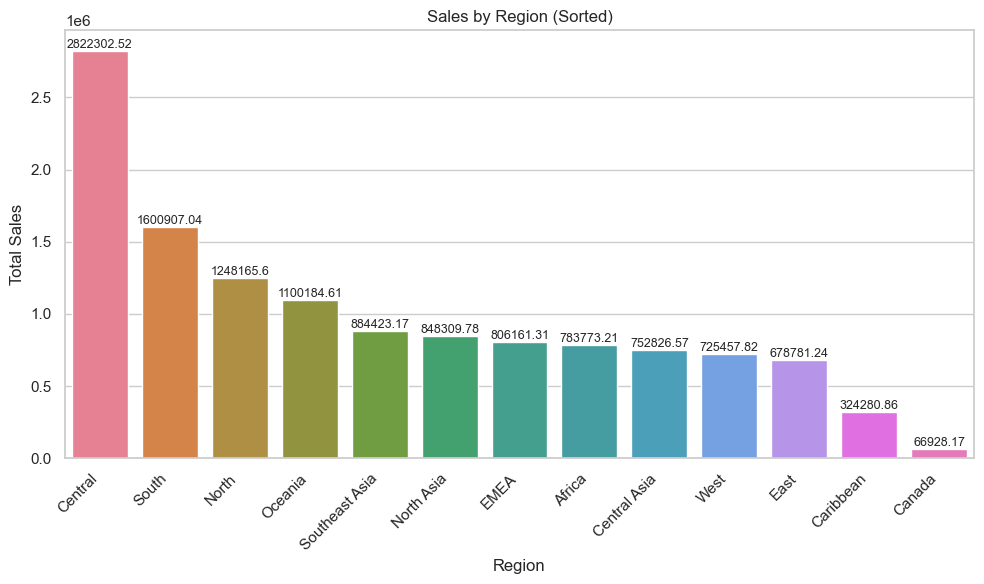

In [257]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=region_sales_table_sorted, palette='husl')

plt.title('Sales by Region (Sorted)')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  
for index, value in enumerate(region_sales_table_sorted['Sales']):
    plt.text(index, value + 10, str(round(value, 2)), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

So, Based on graphic above the Central region has the highest sales with 2,822,302.520 sales

### 3. How do sales vary by product category during different months of the year?

In [258]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [259]:
data['Order Month'] = pd.DatetimeIndex(data['Order Date']).strftime('%B')
order_month_df = data[['Order Date', 'Order Month']]
print(order_month_df)

       Order Date Order Month
0        1/1/2011     January
1        1/1/2011     January
2        1/1/2011     January
3        1/1/2011     January
4        1/1/2011     January
...           ...         ...
51285  31-12-2014    December
51286  31-12-2014    December
51287  31-12-2014    December
51288  31-12-2014    December
51289  31-12-2014    December

[51290 rows x 2 columns]


In [260]:
month_counts = data['Order Month'].value_counts().sort_index()
month_counts_df = pd.DataFrame({'Count': month_counts.values}, index=month_counts.index)
month_order = [calendar.month_name[i] for i in range(1, 13)]
month_counts_df = month_counts_df.reindex(month_order)
reindexed_df = pd.DataFrame({'Month': month_counts_df.index, 'Count': month_counts_df['Count'].values})
reindexed_df

,Month,Count
0,January,3122
1,February,2927
2,March,3728
3,April,3499
4,May,3938
5,June,4892
6,July,3571
7,August,4715
8,September,5237
9,October,4467


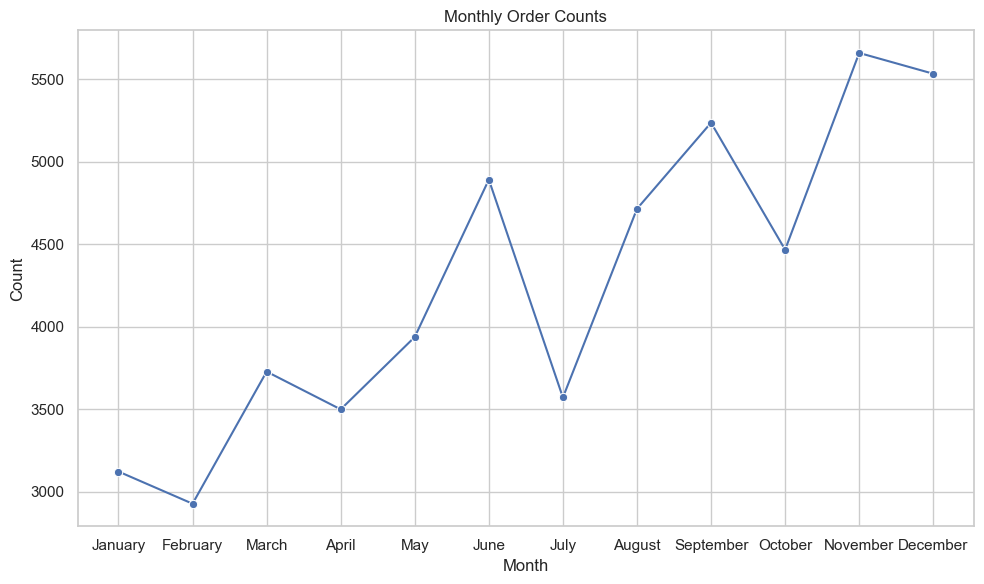

In [261]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=month_counts_df.index, y='Count', data=month_counts_df, marker='o', color='b')

plt.title('Monthly Order Counts')
plt.xlabel('Month')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

So, the highest sales occur in November and the lowest in February

### 4. How is the ship mode distribution for all products? Then what is the relationship between ship mode and the profits obtained?

In [262]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Order Month'],
      dtype='object')

In [263]:
total_order_byshipping = data.groupby('Ship Mode').size()
total_order_df = pd.DataFrame({'Ship Mode': total_order_byshipping.index, 'Total Orders': total_order_byshipping.values})
total_order_df

,Ship Mode,Total Orders
0,First Class,7505
1,Same Day,2701
2,Second Class,10309
3,Standard Class,30775


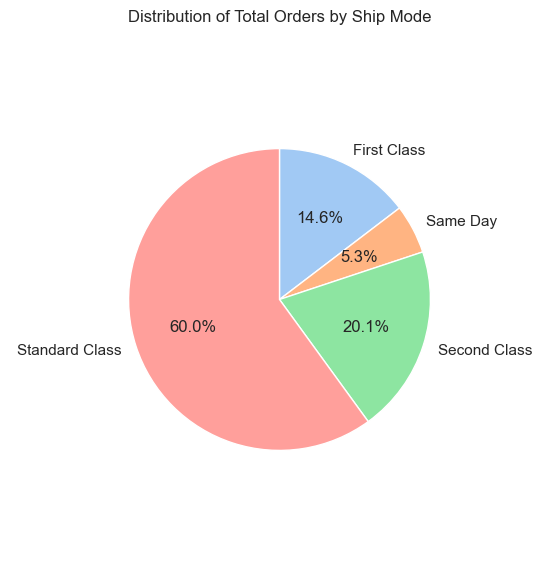

In [264]:
plt.figure(figsize=(7, 7))
plt.pie(total_order_df['Total Orders'], labels=total_order_df['Ship Mode'], autopct='%1.1f%%', startangle=90, counterclock=False, colors=sns.color_palette('pastel'), radius=0.7)
plt.title('Distribution of Total Orders by Ship Mode')
plt.show()

according to the total existing orders, the most orders are with standard class ship mode

In [265]:
negative_profit_by_shipping  = data[data['Profit'] < 0].groupby('Ship Mode').size()
negative_profit_df = pd.DataFrame({'Ship Mode': negative_profit_by_shipping.index, 'Total Orders when Loss': negative_profit_by_shipping.values})
negative_profit_df

,Ship Mode,Total Orders when Loss
0,First Class,1882
1,Same Day,646
2,Second Class,2482
3,Standard Class,7534


In [266]:
negative_profit_df_sum = pd.DataFrame({'Ship Mode': negative_profit_by_shipping.index, 'Total Orders when Loss': negative_profit_by_shipping.values}).sum()
negative_profit_df_sum

Ship Mode                 First ClassSame DaySecond ClassStandard Class
Total Orders when Loss                                            12544
dtype: object

In [267]:
positive_profit_by_shipping = data[data['Profit'] > 0].groupby('Ship Mode').size()
positive_profit_df = pd.DataFrame({'Ship Mode': positive_profit_by_shipping.index, 'Total Orders when Profit': positive_profit_by_shipping.values})
positive_profit_df 

,Ship Mode,Total Orders when Profit
0,First Class,5516
1,Same Day,2021
2,Second Class,7688
3,Standard Class,22853


In [268]:
positive_profit_df_sum = pd.DataFrame({'Ship Mode': positive_profit_by_shipping.index, 'Total Orders when Profit': positive_profit_by_shipping.values}).sum()
positive_profit_df_sum

Ship Mode                   First ClassSame DaySecond ClassStandard Class
Total Orders when Profit                                            38078
dtype: object

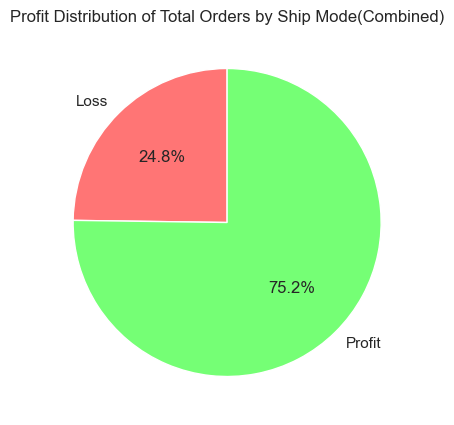

In [269]:
total_orders_loss = negative_profit_df_sum['Total Orders when Loss']
total_orders_profit = positive_profit_df_sum['Total Orders when Profit']
total_orders_combined = total_orders_loss + total_orders_profit

percentages = [total_orders_loss / total_orders_combined * 100, total_orders_profit / total_orders_combined * 100]

labels = ['Loss', 'Profit']
colors = sns.color_palette(['#FF7575', '#75FF75'])

plt.figure(figsize=(5, 5))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Profit Distribution of Total Orders by Ship Mode(Combined)')
plt.show()

According to the graph above, total orders by ship mode is 75% dominated by products that generate profits

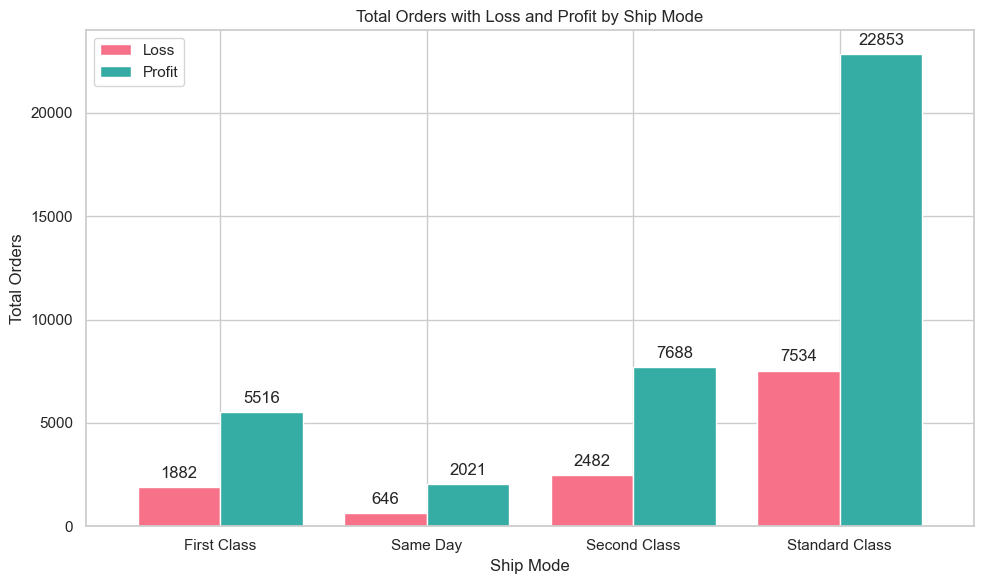

In [270]:
merged_df = pd.merge(negative_profit_df, positive_profit_df  , on='Ship Mode', how='outer').fillna(0)
merged_df = merged_df.set_index('Ship Mode')

colors = sns.color_palette('husl', n_colors=2)
fig, ax = plt.subplots(figsize=(10, 6))
merged_df.plot(kind='bar', ax=ax, width=0.8, color=colors)

plt.title('Total Orders with Loss and Profit by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Orders')
plt.xticks(rotation=0, ha='center')
plt.legend(['Loss', 'Profit'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

Then, if you look at it using a bar diagram based on ship mode like the graph above

### 5. What is the average daily profit distribution? Is there a difference between weekdays and weekends?

In [271]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'Order Month'],
      dtype='object')

In [272]:
data['Order day'] = pd.DatetimeIndex(data['Order Date']).day_name()
data['Order day']

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
51285    Wednesday
51286    Wednesday
51287    Wednesday
51288    Wednesday
51289    Wednesday
Name: Order day, Length: 51290, dtype: object

In [273]:
day_profit = data.groupby('Order day')['Profit'].mean()

day_profit_df = pd.DataFrame({'Day': day_profit.index, 'Average Profit': day_profit.values})
day_profit_df

,Day,Average Profit
0,Friday,27.879
1,Monday,29.265
2,Saturday,31.297
3,Sunday,30.960
4,Thursday,29.192
5,Tuesday,28.864
6,Wednesday,25.058


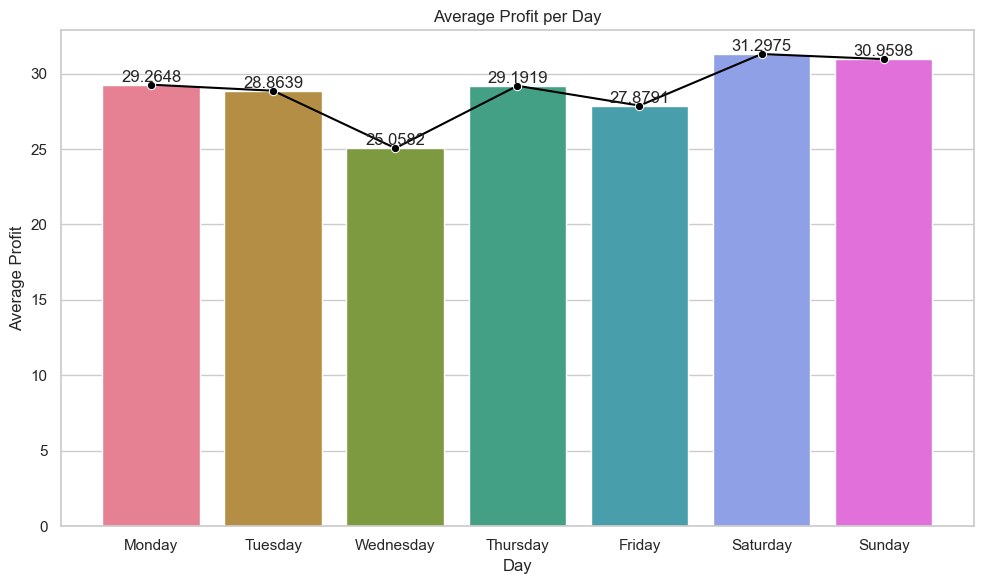

In [274]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_profit_df['Day'] = pd.Categorical(day_profit_df['Day'], categories=day_order, ordered=True)
day_profit_df = day_profit_df.sort_values('Day')

plt.figure(figsize=(10, 6))
day_profit_plot = sns.barplot(x='Day', y='Average Profit', data=day_profit_df, palette='husl')
for bars in day_profit_plot.containers:
    day_profit_plot.bar_label(bars)

sns.lineplot(x='Day', y='Average Profit', data=day_profit_df, sort=False, color='black', marker='o')

plt.title('Average Profit per Day')
plt.xlabel('Day')
plt.ylabel('Average Profit')

plt.tight_layout()
plt.show()

To find out the profit trend each day, the graph above is presented with weekends as the highest average profit.

## The Result

1. According to the graph produced, the most profitable product category is the Technology category, with a profit of more than 600k
2. The highest sales by market are in the APAC (Asia Pacific) market, and the lowest are in Canada. Then, if sales are looked at based on the highest region, namely Central, with sales of more than 2M and the lowest, namely Canada, only 60K
3. Based on the Monthly Order Counts graph, the highest orders were recorded at the end of the year, namely in November and December. The consumer orders were lowest in February. Overall the graph looks consistently rising. However, in June and July, there was a very sharp decline.
4. The distribution of total orders based on ship mode is mostly Standard Class. Meanwhile, Profit Distribution of Total Orders by Ship Mode is dominated by products that generate profits with a percentage of 75% or around 38k products. Then, products with standard class mode experienced losses of around 1/3 of the goods.
5. After calculating the average product profit daily, the highest yield is on weekends (Saturday and Sunday). Meanwhile, the lowest profit is on Saturday. Overall, this graph looks quite fluctuating every day. The chart appears to decrease during weekdays and increases during weekends.

## Suggestions

1) Optimize Technology Category Sales:
By seeing that the Technology category provides the highest profits, companies can focus on marketing strategies and increasing sales for products in this category. This could include:
    - Superstore companies can offer special promotions for Technology products, for example, a 20% discount for purchasing certain Technology products.
    - Superstore companies can increase the visibility of technology products on the website by displaying these products on the front page or in categories that are easily accessible to consumers.
    - Superstore companies can work with influencers to promote Technology products on social media.


2) APAC (Asia Pacific): Since APAC has the highest sales, companies may consider increasing marketing and distribution efforts in this region. Like:
    - Opening new stores or branches in APAC markets.
    - Collaborating with local partners in the APAC market.
    - Offering faster and cheaper delivery services for APAC markets.
    - Translate websites into local APAC languages, for example, Mandarin, Japanese or Korean.
    - Adapting its products and services to the needs of the APAC market, for example, by offering products that suit the tastes of APAC consumers.

    Meanwhile, for regional-level markets, companies can do the following things to increase their demand further:
    - Opening new stores in the Central region, for example, in big cities such as Chicago, Los Angeles or New York.
    - Offer special promotions in the Central region, for example, a 10% discount for purchasing any product.
    - Increase product visibility on the website for the Central region, for example, by displaying these products on the website's front page or in categories that are easily accessible to consumers in the Central region.

    Canada Market: To increase sales in Canada, further analysis needs to be carried out to understand the causes of low sales. There are opportunities to optimize marketing strategies or adjust product portfolios.

3) Handling Monthly Order Trends:
    November and December: Considering that the highest orders occur at the end of the year, companies can prepare inventory and customer service to handle the surge in demand during the holiday season. Apart from that, companies can also offer special discounts or promotions in the year's final months. Running marketing campaigns targeting consumers in the last months of the year. Increase product stock to meet increased demand in the year's final months. Companies can also offer special holiday promotions, such as a 15% discount for purchasing specific products.
    June and July: To overcome the decline in orders this month, further analysis must be conducted to identify the cause. This analysis can be done by conducting surveys or interviews with consumers to determine their opinions about the company's products and services. In addition to consumer surveys, analyze external factors that can influence sales, for example, economic conditions or competition.

4) Further Understanding of Delivery Modes:
    Standard Class: Because Standard Class is the most common shipping mode, companies can do things like the following:
    - Optimize efficiency in delivery, logistics and costs to increase profitability.
    - Collaborate with other shipping companies to increase the efficiency of Standard Class mode shipping.
    - Use technology to track Standard Class shipments so companies can identify and fix problems that cause shipment delays or damage.
    - Offers more competitive prices for products in Standard Class mode.
    - Developing lighter and smaller products to reduce shipping costs.

    For other delivery modes, further analysis is needed to understand why some ways generate less profit. It is necessary to evaluate and adjust the delivery strategy.

5) Daily Sales Optimization:
    Weekends vs Weekdays: Knowing that the highest profits occur on weekends, companies can consider optimizing marketing strategies, promotions, or special activities to increase sales during weekends, such as holding weekend discounts to expand the market.
    Daily Fluctuations: Understanding daily fluctuations in profits can help companies identify patterns and optimize resources on high-demand days.